In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('undersampled_train_dataset.csv')

In [3]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(how="any", inplace=True)

In [4]:
dataset = df.values

In [5]:
X = dataset[:, :-1]
Y = dataset[:, -1:]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
Y_train = Y_train.ravel()

X_test_std = scaler.transform(X_test)

In [8]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [9]:
rfe = RFE(estimator=LogisticRegression(solver='sag', max_iter=3000, tol=5e-4), n_features_to_select=20, step=2)
_ = rfe.fit(X_train_std, Y_train)

KeyboardInterrupt: 

In [10]:
rfe.support_

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True, False, False, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False])

In [11]:
df.columns[:-1][rfe.support_]

Index(['freq_qid1', 'freq_qid2', 'word_share', 'freq_sum', 'freq_diff',
       'braycurtis', 'euclidean', 'squared_euclidean', 'cwc_min', 'ctc_max'],
      dtype='object')

In [12]:
clf = LogisticRegression(solver='sag', max_iter=3000, tol=5e-4)
_ = clf.fit(rfe.transform(X_train_std), Y_train)

In [13]:
clf.score(rfe.transform(X_train_std), Y_train)

0.7908892953575473

In [14]:
clf.score(rfe.transform(X_test_std), Y_test)

In [15]:
# from sklearn.feature_selection import RFECV

In [16]:
# # Init, fit
# rfecv = RFECV(
#     estimator=LogisticRegression(solver='sag', max_iter=3000, tol=5e-4),
#     step=1,
#     n_jobs=-1,
#     scoring="accuracy",
#     cv=5,
# )

In [17]:
# _ = rfecv.fit(X_train_std, Y_train)

In [18]:
# print("Optimal number of features : ")
# rfecv.n_features_

Optimal number of features : 


44

In [19]:
# rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1])

In [20]:
# import matplotlib.pyplot as plt

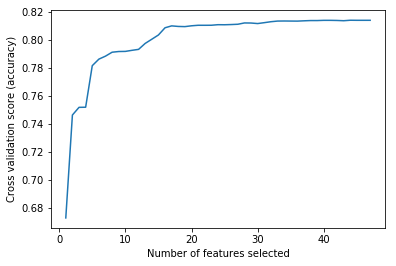

In [21]:
# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (accuracy)")
# plt.plot(
#     range(1, len(rfecv.grid_scores_) + 1),
#     rfecv.grid_scores_,
# )
# plt.show()

In [22]:
# df.columns[:-1][rfecv.support_]

Index(['freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_words', 'q2_words',
       'q1_characters', 'q2_characters', 'q1_u_words', 'q2_u_words',
       'q2_u_words_wo_sw', 'total_u_words_wo_sw', 'word_common', 'word_total',
       'word_share', 'freq_sum', 'freq_diff', 'chebyshev', 'braycurtis',
       'cosine', 'correlation', 'canberra', 'cityblock', 'euclidean',
       'minkowski', 'squared_euclidean', 'word_mover_distance', 'skew_q1',
       'skew_q2', 'kurtosis_q1', 'kurtosis_q2', 'cwc_min', 'csc_min',
       'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq', 'abs_len_diff',
       'mean_len', 'fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio',
       'token_set_ratio', 'longest_substr_ratio'],
      dtype='object')

In [23]:
# clf = LogisticRegression(solver='sag', max_iter=3000, tol=5e-4)
# _ = clf.fit(rfecv.transform(X_train_std), Y_train)

In [24]:
# clf.score(rfecv.transform(X_test_std), Y_test)

0.81560366051934785

In [25]:
# clf.score(rfecv.transform(X_test_std), Y_test)

0.81560366051934785